In [37]:
require(stringr)
data <- read.csv(file="tmax_data.csv", header=TRUE, sep=",")
head(data)

Loading required package: stringr


Date,Station,Tmax,Deaths
1/1/1989,USC00445300,42.08,21
2/1/1989,USC00445300,75.02,11
3/1/1989,USC00445300,53.96,25
4/1/1989,USC00445300,51.98,26
5/1/1989,USC00445300,75.02,14
6/1/1989,USC00445300,93.92,40


In [40]:
data$Year <- str_sub(data$Date,-4,-1)
data$Year <- sapply(data['Year'], as.numeric)
head(data)

Date,Station,Tmax,Deaths,Year
1/1/1989,USC00445300,42.08,21,1989
2/1/1989,USC00445300,75.02,11,1989
3/1/1989,USC00445300,53.96,25,1989
4/1/1989,USC00445300,51.98,26,1989
5/1/1989,USC00445300,75.02,14,1989
6/1/1989,USC00445300,93.92,40,1989


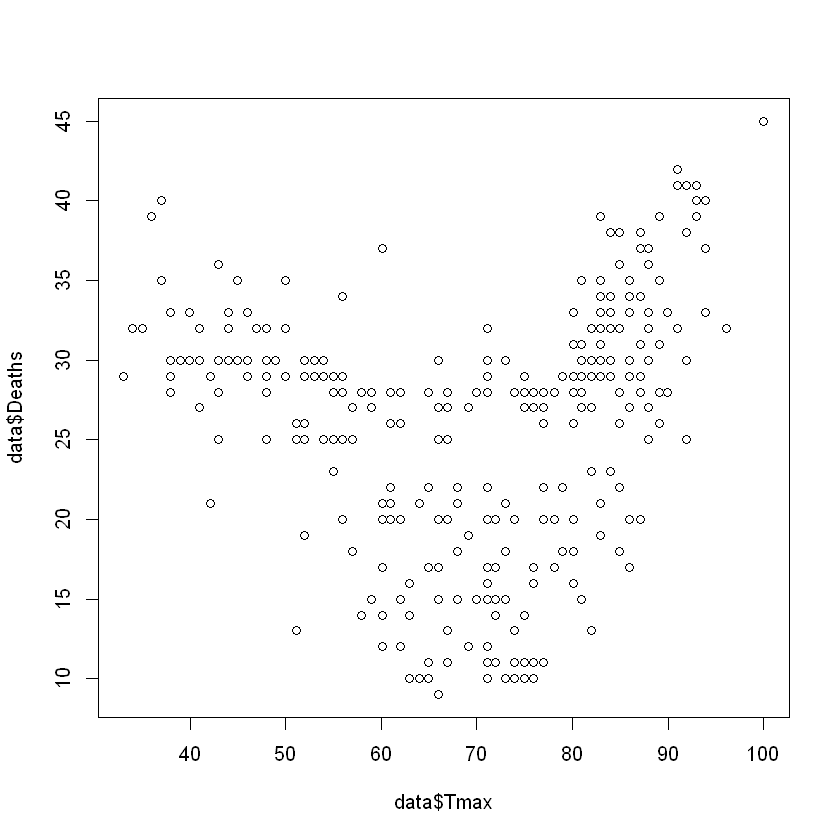

In [26]:
plot(data$Tmax, data$Deaths)

In [44]:
require(mgcv)
m <- gam(Deaths ~ s(Tmax) + s(Year), data=data)
summary(m)



Family: gaussian 
Link function: identity 

Formula:
Deaths ~ s(Tmax) + s(Year)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  25.6824     0.3155   81.41   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
          edf Ref.df     F p-value    
s(Tmax) 5.084  6.209 48.37 < 2e-16 ***
s(Year) 4.461  5.474  3.98 0.00116 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.507   Deviance explained = 52.2%
GCV = 32.733  Scale est. = 31.647    n = 318


Method: GCV   Optimizer: magic
Smoothing parameter selection converged after 6 iterations.
The RMS GCV score gradient at convergence was 0.0001369214 .
The Hessian was positive definite.
Model rank =  19 / 19 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

          k'  edf k-index p-value    
s(Tmax) 9.00 5.08    0.90   0.035 *  
s(Year) 9.00 4.46    0.71  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


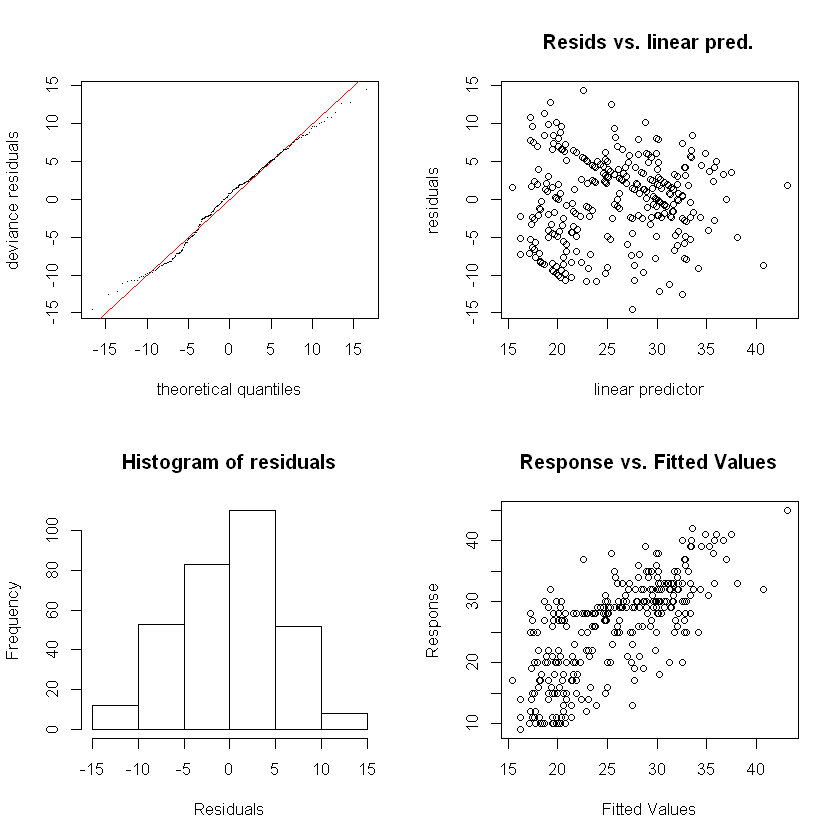

In [45]:
gam.check(m)